# Proyecto Integrado

### Descripción del proyecto

Una tienda online Ice que vende videojuegos por todo el mundo.
Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.
Identificar patrones que determinen si un juego tiene éxito o no.
Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y se esta planeando una campaña para 2017.


##  Abrir  el archivo de datos y estudia la información general

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st


Abrir el arcivo y revisar la informacion en general.

In [400]:
df_games = pd.read_csv('games.csv')

In [401]:
df_games.info()

In [402]:
df_games.head(10)

In [403]:
df_games['Platform'].nunique()

##   Prepara los datos

Colocar los encabezados en Mayusculas

In [404]:
new_col_name=[]
for old_name in df_games.columns:
    name_lowered= old_name.lower()
    new_col_name.append (name_lowered)

df_games.columns=new_col_name

Verificar los encabezados

In [405]:
df_games.head()

Las columans que considero mantiende un tipo de dato incorrecto son 'year_of release' y 'user_score' por lo que debemos cambiarlos a "datetime" e "int" respectivamente.

Encontramos que en ambos casos existen datos faltantes.
Inicamos analisando 'year_of release'

In [406]:
year_nan= df_games[df_games['year_of_release'].isna()]
year_nan.info()



Tras no encontrar alguna relacion entre los diferentes años de salida flatante, he decidido rellenar con "0" ya que la unica forma de hacerlo certeramente es investigando uno a uno el año de salida de cada titulo, ademas la cantidad de años faltantes  representa el 1.6% del total de los datos por lo  que podria entrar dentro del margen de error para un analisis futuro.

Cambiamos el tipode dato del 'year-of_release' a entero.

In [407]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(0).astype('int')

Los datos de las puntuaciones no podemos rellenar los con "0" ya que podemos inferir que no poseen una puntuación por lo que colocar un "0" seria decir que el juego es malo y no que no esta puntuado.

Por el contrari  las ventas, ya que existen juegos que se vendieron en alguna regiones pero en otras no, por lo que en las regiones que no se vendieron el total de las ventas es de 0.
Por lo que podemos rellenar estos datos ausentes en cero.


In [408]:
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].median())

La columna ‘critic_score’ es una puntuación sobre 100  por lo que no tiene números de punto flotante , por lo tanto los convertiremos en enteros.

In [409]:
df_games['critic_score'] = df_games['critic_score'].astype(int)

In [410]:
df_games.query('user_score=="tbd"')

In [411]:
df_games.loc[ df_games['user_score'] == 'tbd', 'user_score'] = np.nan

In [412]:
df_games['user_score'] = df_games['user_score'].astype('float')

In [413]:
df_games.info()

Notamos que faltan dos datos tanto en “name” como en  “genre” , analicemos si se trata de los mismo títulos y si se pueden rellenar.

In [414]:
name_nan= df_games[df_games['name'].isna()]
name_nan

Ambos titulos son de la misma plataforma y del mosmo año pr lo que solo rellenaremos esos dtos con "No_info"

In [415]:
df_games['name'] = df_games['name'].fillna('No_info')
df_games['genre'] = df_games['genre'].fillna('No_info')

In [416]:
df_games.info()

Verificamos que no tenemos datos duplicados

In [417]:
df_games.duplicated().sum()

Calculo de ventas totales 

In [418]:
df_games['ventas_totales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

df_games.head()

##  Analiza los datos

Revisar cuantos juegos fueron lanzados en diferentes años:

In [419]:
game_for_year = df_games.groupby('year_of_release')['name'].count().reset_index()
game_for_year = game_for_year[game_for_year['year_of_release'] != 0]

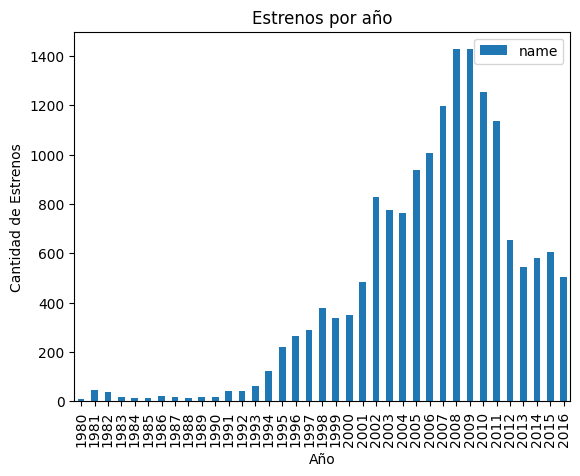

In [420]:
game_for_year.plot(kind='bar',
                   x= 'year_of_release',
                   y= 'name',
                   title= 'Estrenos por año',
                   xlabel= 'Año',
                   ylabel= 'Cantidad de Estrenos')

El crecimiento en pasado los 2000’s es enorme, supongo que  por el desarrollo de tecnología en ese tiempo lo que dio pie a que el desarrollo de videojuegos en diferentes consolas fuera creciendo y se estrenaran cada vez mas títulos. 

Determinemos cuales fueron los tituos con mayor numero de ventas totales.

Determinemos cuales fueron los tituos con menor numero de ventas totales.

In [421]:
top_ventas_titulos = df_games.nlargest(5, ['ventas_totales'])
mal_venta_titulos = df_games.nsmallest(5, ['ventas_totales'])

Calculo de ventas totales por plataforma

In [422]:
ventas_plataforma= df_games.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index()
ventas_plataforma.head(3)

Para realizar un correcto analisis de la variacion de ventas es comveneinte determinar la "z_score" o puntuacion "z"

Consisite en restar las ventas totales del promedio de las ventas y dividirlo entre la desviacion estandar.
Asi determinamos que tan alejado esta la venta de la meda en terminos de desviacion estandar.


In [423]:
ventas_plataforma['z_score'] = (ventas_plataforma['ventas_totales'] - ventas_plataforma['ventas_totales'].mean()) / ventas_plataforma['ventas_totales'].std()
ventas_plataforma.head(3)

In [424]:
ventas_plataforma['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in ventas_plataforma['z_score']]
ventas_plataforma.head(3)

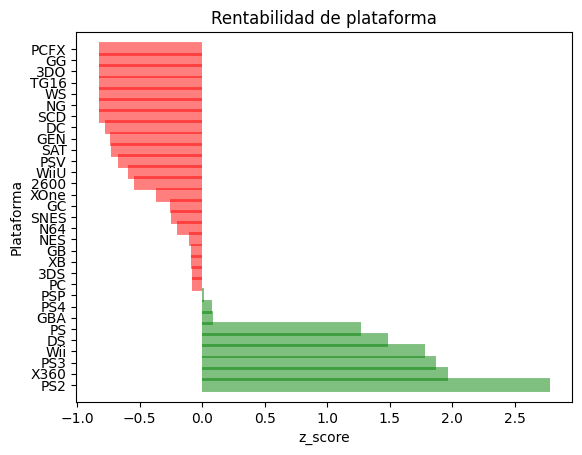

In [425]:
plt.figure()
plt.hlines( y = ventas_plataforma.platform,
           xmin = 0,
           xmax = ventas_plataforma.z_score,
           color = ventas_plataforma.color,
           linewidth = 10,
           alpha = 0.5)

plt.xlabel('z_score')
plt.ylabel('Plataforma')
plt.title('Rentabilidad de plataforma')  
plt.show()         

Los valores de venta en color verde son las plataformas cuyas ventas se encuentran sobre la media , incluso podmos visualisar que tan debajo o por ensima se encuentra la platafroma del valor pormedio. 

Determinamos una tabla pivot para poder juntar los datos necesarios para el analisis.

In [426]:
df_games.head()

In [427]:
df_games_actual = df_games.query('year_of_release >= 1997 and platform == ["PS2","X360","PS3","Wii","DS","PS"] ') 
time_life = pd.pivot_table(df_games_actual, index='year_of_release', columns='platform', values='ventas_totales', aggfunc='sum').fillna(0)
time_life

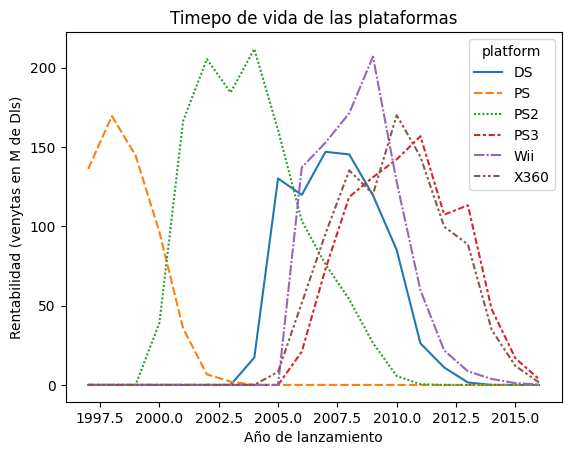

In [428]:
sns.lineplot(data=time_life)
plt.ylabel('Rentabilidad (venytas en M de Dls)')
plt.xlabel('Año de lanzamiento')
plt.title('Timepo de vida de las plataformas')
plt.show()

La grafica donde colocamos las consolas mas rentables da la impresion que la vida util de una plataforma (consola de videojuegos ) es de 8 a 10 años.

Tambien podemos ver que  los años de mayor actividad de ventas para las consolas es entre los años 2004 y el 2016.

Vamos a separar los datos relevantes es decir las plataformas dadas en la grafia anterior "Tiempo de vida de las plataformas" y el rango de años mas util (2004-2016)

In [429]:
df_relevantes = df_games.query('year_of_release >= 2004  and year_of_release <= 2016 and platform == ["PS2","X360","PS3","Wii","DS","PS"] ') 
df_relevantes


Realizamos una gráfica similar a la que evaluó a todas las plataformas para  poder determinar la media y la dispersión con respecto a esta pero solo de los datos relevantes.

In [430]:
df_relevantes['z_score'] = (df_relevantes['ventas_totales'] - df_relevantes['ventas_totales'].mean()) / df_relevantes['ventas_totales'].std()
df_relevantes['color'] = ['red' if  ventas_z< 0 else 'green' for ventas_z in df_relevantes['z_score']]
df_relevantes.head()

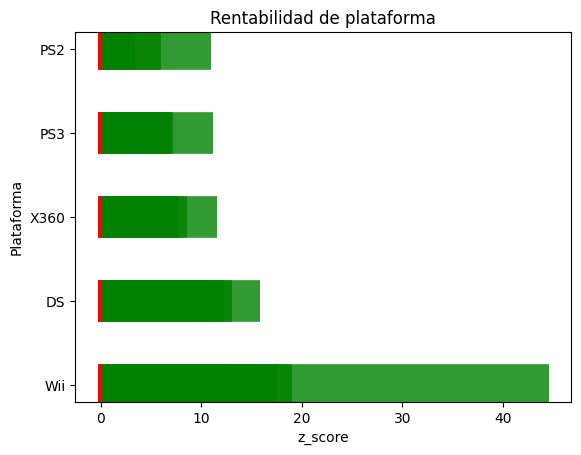

In [431]:
plt.figure()
plt.hlines( y = df_relevantes.platform,
           xmin = 0,
           xmax = df_relevantes.z_score,
           color = df_relevantes.color,
           linewidth = 30,
           alpha = 0.8)

plt.xlabel('z_score')
plt.ylabel('Plataforma')
plt.title('Rentabilidad de plataforma')  
plt.show()   

Podemos ver que las dos plataformas más rentables las cuales rebasan la media significativamente son “Wii” y  “DS” ambas pertenecientes a Nintendo.

Analicemos los datos relevantes por medio de un Diagrama de Caja  de las ventas totales de los juegos pertenecientes a cada plataforma.

In [432]:
ventas_glob_plat = df_relevantes.groupby('platform')['ventas_totales'].sum()
print(ventas_glob_plat.head())

In [433]:
ventas_glob_plat.describe()

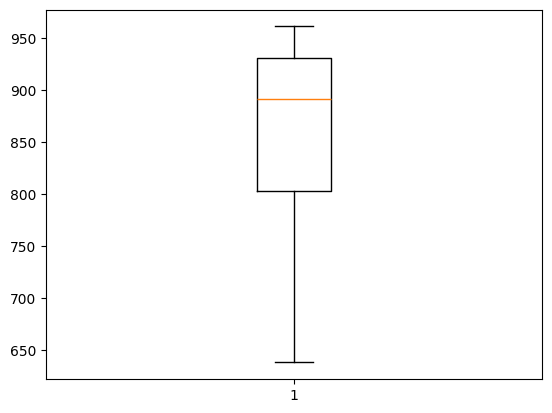

In [434]:
plt.boxplot(ventas_glob_plat.dropna() )
plt.show()


Podemos observar que el 50 % de los datos se encuentran entre  650 y 900 MDD, sin embargo  la brecha entre los 800 y 650 MDD es considerablemente grande.

Revisemos como es que las reseñas puntuaciones  de los juegos, afectan a las ventad de las plataformas que los distribuyen.

Primero saquemos un promedio de las dos puntuaciones “critic_score” y “user_score” creando una columna nueva llamada “mean_score”.
Esta última será el parámetro a comparar con las ventas.


In [435]:
df_relevantes['mean_score'] = ((df_relevantes['critic_score']/10) + df_relevantes['user_score'])/2
df_relevantes.head()

In [436]:
metricas_x360 = df_relevantes.query('platform == "X360" ') 


Calculamos la correlación que existe entre estos dos parámetros:


In [437]:
metricas_x360['ventas_totales'].corr(metricas_x360['mean_score'])

Obtuvimos una correlación de  0.26 , un parámetro bastante alejado del 1 o del -1 lo que expresa una correlación muy baja, no parece afectar a las ventas directas de la plataforma general.

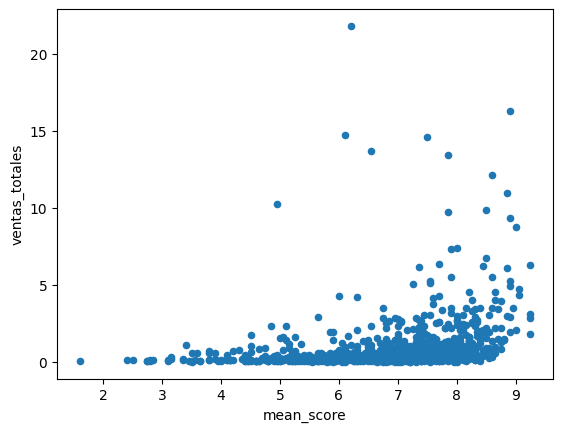

In [438]:
metricas_x360.plot(x='mean_score',
                   y='ventas_totales',
                   kind= 'scatter')

Lo podemos corroborar en la gráfica de dispersión teniendo una agrupación entre 0 y 5 MDD sin importan tanto la puntuación, vemos que los títulos de menor puntaje y de mayor puntaje se mantienen en ese rango, salvo algunas excepciones.

Vamos a confirmar que no dependen las ventas de las puntuaciones evaluando un solo juego en diferentes plataformas.

In [439]:
df_games['mean_score'] = ((df_games['critic_score']/10) + df_games['user_score'])/2
metricas_GTAV = df_games.query('name == "Grand Theft Auto V" ') 
metricas_GTAV

In [440]:
df_games['ventas_totales'].corr(df_games['mean_score'])

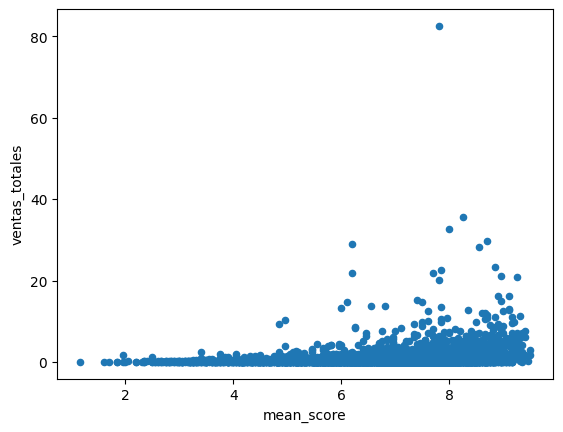

In [441]:
df_games.plot(x='mean_score',
                   y='ventas_totales',
                   kind= 'scatter')

De nueva cuenta obtenemos una correlación muy pequeña, esta vez de 0.17 y aun que son más las excepciones, las ventas no se disparan drásticamente a medida que la puntuación mejora, las ventas de los títulos deben estar relacionados a algo más.

Echemos un vistazo  los géneros de los juegos por plataforma.


In [442]:
ventas_por_genero= df_games.groupby('genre')['ventas_totales'].sum().sort_values(ascending=False).reset_index()
ventas_por_genero

In [443]:
ventas_por_genero['z_score'] = (ventas_por_genero['ventas_totales'] - ventas_por_genero['ventas_totales'].mean()) / ventas_por_genero['ventas_totales'].std()
ventas_por_genero.head(3)

In [444]:
ventas_por_genero['color'] = ['red' if ventas_z < 0 else 'green' for ventas_z in ventas_por_genero['z_score']]
ventas_por_genero.head(3)

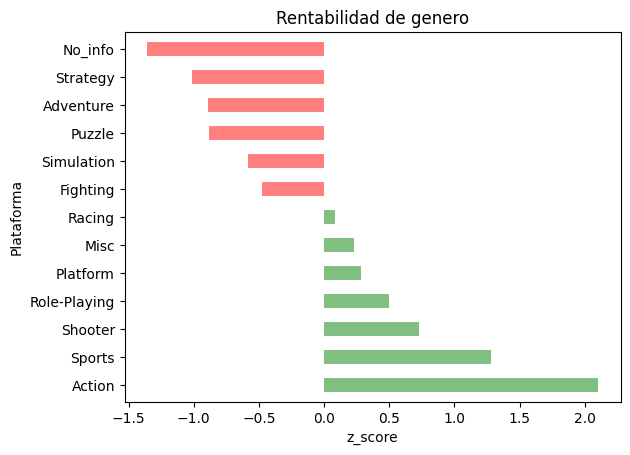

In [445]:
plt.figure()
plt.hlines( y = ventas_por_genero.genre,
           xmin = 0,
           xmax = ventas_por_genero.z_score,
           color = ventas_por_genero.color,
           linewidth = 10,
           alpha = 0.5)

plt.xlabel('z_score')
plt.ylabel('Plataforma')
plt.title('Rentabilidad de genero')  
plt.show()         

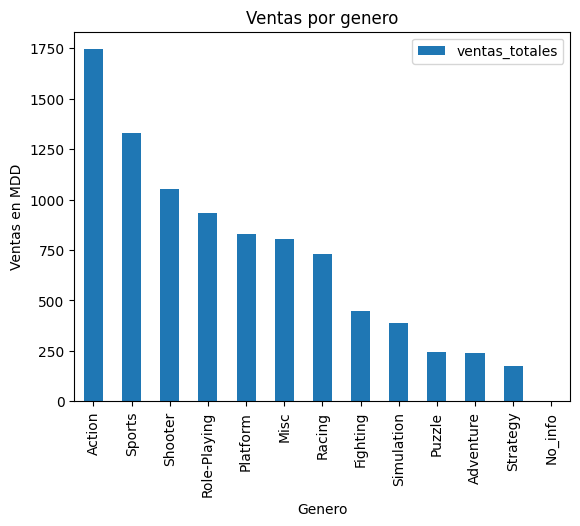

In [446]:
ventas_por_genero.plot(kind='bar',
                   x= 'genre',
                   y= 'ventas_totales',
                   title= 'Ventas por genero',
                   xlabel= 'Genero',
                   ylabel= 'Ventas en MDD')

Podemos decir que los generes más rentables son “Action”,”Sports” y “Shooter”
Y los números nos permitirían generalizar , ya que se realizó con todos los datos , no solo los de plataformas populares.


##  Crea un perfil de usuario para cada región


Para generar un perfil por usuario para cada región en ventas, podemos iniciar revisando las ventas por región de nuestras 5 plataformas principales.

Clasificamos primero las ventas totales por región y plataforma  para posteriormente separar las plataformas principales.

In [447]:
ventas_na= df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
ventas_na = ventas_na.query('platform == ["PS2","PS3","X360","DS","Wii"]')
ventas_eu= df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
ventas_eu = ventas_eu.query('platform == ["PS2","PS3","X360","DS","Wii"]')
ventas_jp= df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
ventas_jp = ventas_jp.query('platform == ["PS2","PS3","X360","DS","Wii"]')


Unimos todas las clasificaciones en un solo DF.

In [448]:
Ventas_plat_region = ventas_na.merge(ventas_eu,on=['platform'],how='outer')
Ventas_plat_region = Ventas_plat_region.merge(ventas_jp,on=['platform'],how='outer').sort_index()

Realizamos una gráfica comparativa de las regiones.

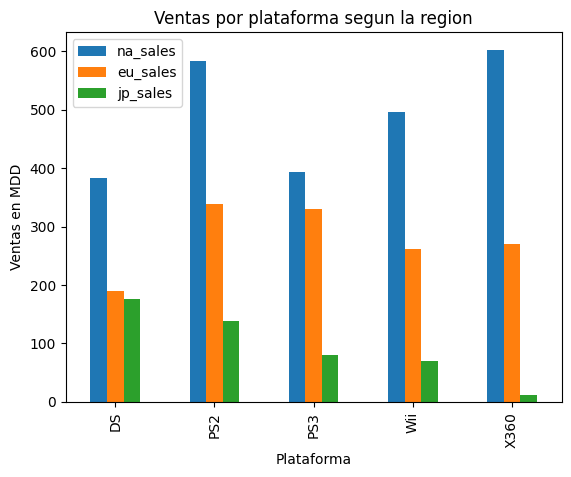

In [449]:
Ventas_plat_region.plot(kind='bar',
                   x= 'platform',
                   title= 'Ventas por plataforma segun la region',
                   xlabel= 'Plataforma',
                   ylabel= 'Ventas en MDD')

La ventaja de ventas de los títulos en plataformas, la atribuiría en el origen de la plataforma, ya que podemos notar que aun que pocas, llegan a ser relevantes las ventas de JP para todas las consolas de origen Japonés  el caso de Sony con PS2 Y PS3 y EL CASO DE Nintendo con la DS y la Wii, sin embargo, las ventas de la plataforma estadounidense de Microsoft es decir la Xbox 360  escasea con sus ventas en Japón.
Altener pocas ventas de la plataforma también se venden pocos títulos.


In [450]:
ventas_gen_na= df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
ventas_gen_na = ventas_gen_na.query('genre == ["Action","Sports","Shooter","Role-Playing","Platform"]')
ventas_gen_eu= df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
ventas_gen_eu = ventas_gen_eu.query('genre == ["Action","Sports","Shooter","Role-Playing","Platform"]')
ventas_gen_jp= df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
ventas_gen_jp = ventas_gen_jp.query('genre == ["Action","Sports","Shooter","Role-Playing","Platform"]')

In [451]:
Ventas_gen_region = ventas_gen_na.merge(ventas_gen_eu,on=['genre'],how='outer')
Ventas_gen_region = Ventas_gen_region.merge(ventas_gen_jp,on=['genre'],how='outer').sort_index()

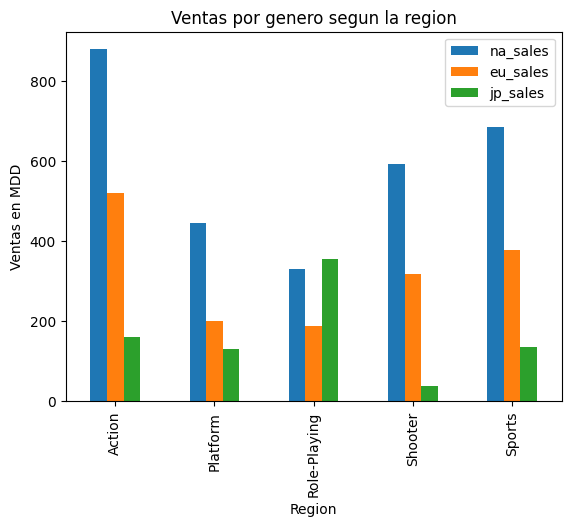

In [452]:
Ventas_gen_region.plot(kind='bar',
                   x= 'genre',
                   title= 'Ventas por genero segun la region',
                   xlabel= 'Region',
                   ylabel= 'Ventas en MDD')

Podemos ver cuáles son los géneros favoritos según la región en donde se venden.
Los juegos de acción parecen ser los favoritos en la mayoría de las regiones pero  en Japón existe una tendencia por los juegos de rol, seguramente por el ritmo de vida de las personas de la región.



In [453]:
ventas_rating_na= df_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).dropna().reset_index()
ventas_rating_eu= df_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).dropna().reset_index()
ventas_rating_jp= df_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).dropna().reset_index()

In [454]:
Ventas_rating_region = ventas_rating_na.merge(ventas_rating_eu,on=['rating'],how='outer')
Ventas_rating_region = Ventas_rating_region.merge(ventas_rating_jp,on=['rating'],how='outer').sort_index()

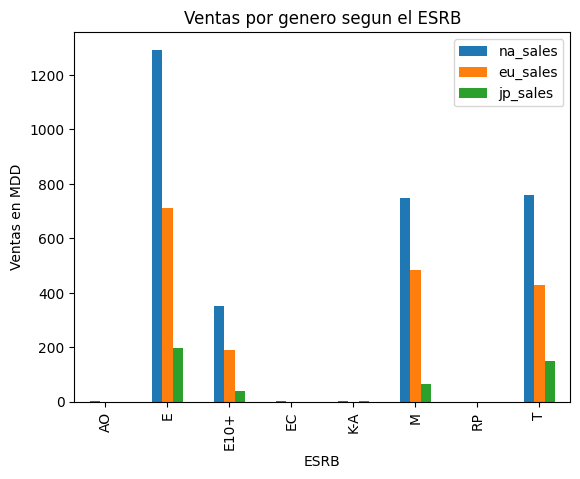

In [455]:
Ventas_rating_region.plot(kind='bar',
                   x= 'rating',
                   title= 'Ventas por genero segun el ESRB',
                   xlabel= 'ESRB',
                   ylabel= 'Ventas en MDD')

Son notables pero muy ambigua las ventas por ESRB ya que en muchos casos esta cambia en algunos títulos según la plataforma o región, sin embargo parecen ser 3 las clasificaciones predominantes.

En primera instancia podemos notar que las ventas de NA son las que predominan en cualquier  análisis, mientras que en contraste las ventas en JP  son muy inferiores, sin importar la plataforma o el ESRB.
Sin embargo si hablamos del genero podemos encontrar una excepción ya que en Role-playing .


Para cerrar, podemos notar que para NA los videojuegos son tan importantes que podríamos decir que es incuso un estilo de vida  a deferencia de EU que parece ser solo un pasatiempo o en JP que al tener acceso a tantos tipos de tecnología una o plataforma de videojuegos no parece ser un boom.

##  Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [456]:
platforms=['XOne','PC']
for platform in platforms:
    prom=df_games[df_games['platform']==platform]['mean_score'].mean()
    print(f'La puntuacion promedio de {platform} es de {prom}' )

La hipotesis nula a trabajar es que la puntuacion promedio de la "XOne" es igual a la de la "PC"

In [457]:
alpha=0.05
sample_1 = df_games.query('platform=="XOne"')['mean_score'].dropna() 
sample_2 = df_games.query('platform=="PC"')['mean_score'].dropna() 


In [458]:
resultado = st.ttest_ind(sample_1,sample_2, equal_var=False)
print (f'p-value:{resultado.pvalue}')

In [459]:
if resultado.pvalue<alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [460]:
genres=['Action','Sports']
for genre in genres:
    prom_b=df_games[df_games['genre']==genre]['mean_score'].mean()
    print(f'La puntuacion promedio de {genre} es de {prom_b}' )

La hipotesis nula a trabajar es que la puntuacion promedio de Los Generos  "Accion" es igual a la de "Deportes"

In [461]:
alpha=0.05

In [462]:
sample_3 = df_games.query('genre=="Action"')['mean_score'].dropna()
sample_4 = df_games.query('genre=="Sports"')['mean_score'].dropna()

In [463]:
resultado_2 = st.ttest_ind(sample_3,sample_4, equal_var=False)
print (f'p-value:{resultado_2.pvalue}')

In [464]:
if resultado_2.pvalue<alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Las calificaciones promedio de los usuarios para los géneros e Acción y Deportes  son consideradas iguales ya que la diferencia es de unas pocas décimas y ambas se encuentran arriba de 6.5 por lo que podemos rondar a 7 en ambos casos.
Elegimos el método con la función “scipy.stats.ttest_ind()” como criterio por que verifica la igualdad de las medias de dos poblaciones. 


En general podemos establecer una campaña enfocada a un mercado NA con plataformas  de última generación abarcando desde el año 2013  hasta el 2018 ya que aún siguen dentro de la vida útil.
Se buscaría que los desarrolladores de juegos se enfoquen en los géneros de Acción, Deportes Y Shooters , dejando a los independientes con los juegos e plataforma y de rol-playing .
Considerar que las plataformas Japonesas tienen mucho más auge dentro de la industria que las de Norte América 
